# Project Team 6 : Customer Purchase Behaviour for Online Shopping


# Team Members : Anuj Garlapati , Gagan Deep Kohli , Sumeet Kahlon

In [2]:
from numpy.random import randn
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt

%matplotlib inline
import pickle 

# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")



In [3]:
dataframeAisle= pd.read_csv('DataProduct/aisles.csv',sep=',',engine='python')

In [4]:
dataframeAisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [5]:
dataframeAisle.columns[dataframeAisle.isnull().any()]

Index([], dtype='object')

In [6]:
dataframedepartments= pd.read_csv('DataProduct/departments.csv',sep=',',engine='python')

In [7]:
dataframedepartments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
dataframedepartments.columns[dataframedepartments.isnull().any()]

Index([], dtype='object')

In [9]:
dataframeProduct= pd.read_csv('DataProduct/products.csv',sep=',',engine='python')

In [10]:
dataframeProduct.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [11]:
dataframeProduct.columns[dataframeProduct.isnull().any()]

Index([], dtype='object')

In [12]:
ListOrder = []
for df in pd.read_csv('DataProduct/orders.csv',sep=',',engine='python',chunksize=100000):
    ListOrder.append(df)

dataframeOrder = pd.concat(ListOrder,sort=False)

In [13]:
len(dataframeOrder)

3421083

In [14]:
dataframeOrder.columns[dataframeOrder.isnull().any()]

Index(['days_since_prior_order'], dtype='object')

In [15]:
dataframeOrder.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
ListOrderProductPrior=[]
for df in pd.read_csv('DataProduct/order_products__prior.csv',sep=',',engine='python',chunksize=100000):
    ListOrderProductPrior.append(df)
    
dataframeOrderProductPrior = pd.concat(ListOrderProductPrior,sort=False)

In [17]:
dataframeOrderProductPrior.columns[dataframeOrderProductPrior.isnull().any()]

Index([], dtype='object')

In [18]:
dataframeOrderProductPrior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [19]:
len(dataframeOrderProductPrior)

32434489

In [20]:
len(dataframeOrder)

3421083

In [21]:
merged_order_product_prior = pd.merge(dataframeOrder,dataframeOrderProductPrior,how='left',on='order_id')

In [22]:
merged_order_product_prior.days_since_prior_order.fillna(0,inplace=True)


In [23]:
merged_order_product_prior.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,0.0,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,0.0,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,0.0,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,0.0,26405.0,5.0,0.0
5,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0
6,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0
7,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0
8,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0
9,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0


In [24]:
len(merged_order_product_prior)

32640698

In [25]:
merged_order_product_prior[merged_order_product_prior['product_id'].isnull()].head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
59,1187899,1,train,11,4,8,14.0,NaN,NaN,NaN
255,1492625,2,train,15,1,11,30.0,NaN,NaN,NaN
344,2774568,3,test,13,5,15,11.0,NaN,NaN,NaN
363,329954,4,test,6,3,12,30.0,NaN,NaN,NaN
401,2196797,5,train,5,0,11,6.0,NaN,NaN,NaN
416,1528013,6,test,4,3,16,22.0,NaN,NaN,NaN
623,525192,7,train,21,2,11,6.0,NaN,NaN,NaN
673,880375,8,train,4,1,14,10.0,NaN,NaN,NaN
750,1094988,9,train,4,6,10,30.0,NaN,NaN,NaN
894,1822501,10,train,6,0,19,30.0,NaN,NaN,NaN


In [26]:
order_product_prior = merged_order_product_prior.dropna(axis=0, subset=['product_id'])

In [27]:
order_product_prior.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196.0,1.0,0.0
1,2539329,1,prior,1,2,8,0.0,14084.0,2.0,0.0
2,2539329,1,prior,1,2,8,0.0,12427.0,3.0,0.0
3,2539329,1,prior,1,2,8,0.0,26088.0,4.0,0.0
4,2539329,1,prior,1,2,8,0.0,26405.0,5.0,0.0
5,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0
6,2398795,1,prior,2,3,7,15.0,10258.0,2.0,0.0
7,2398795,1,prior,2,3,7,15.0,12427.0,3.0,1.0
8,2398795,1,prior,2,3,7,15.0,13176.0,4.0,0.0
9,2398795,1,prior,2,3,7,15.0,26088.0,5.0,1.0


In [28]:

order_product_prior['product_id'] = order_product_prior['product_id'].apply(np.int64)

In [29]:
order_product_prior['days_since_prior_order'] = order_product_prior['days_since_prior_order'].apply(np.int64)

In [30]:

order_product_prior['add_to_cart_order'] = order_product_prior['add_to_cart_order'].apply(np.int64)

In [31]:

order_product_prior['reordered'] = order_product_prior['reordered'].apply(np.int64)




In [32]:
order_product_prior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32640696
Data columns (total 10 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
dtypes: int64(9), object(1)
memory usage: 2.7+ GB


In [33]:
order_product_prior.drop('eval_set',axis=1,inplace=True)

In [34]:
pickle.dump(order_product_prior,open('order_product_prior.pkl',"wb"))

In [35]:
order_product=pd.merge(order_product_prior,dataframeProduct,how='left')

In [36]:
order_product.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,0,196,1,0,Soda,77,7
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,2,3,7,15,196,1,1,Soda,77,7
6,2398795,1,2,3,7,15,10258,2,0,Pistachios,117,19
7,2398795,1,2,3,7,15,12427,3,1,Original Beef Jerky,23,19
8,2398795,1,2,3,7,15,13176,4,0,Bag of Organic Bananas,24,4
9,2398795,1,2,3,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19


# 1. Top 10 Most Ordered Products 

In [37]:
top10OrderedProduct=order_product.groupby('product_name').size().sort_values(ascending=False).reset_index(name='Product_Count').head(10)

In [38]:

top10OrderedProduct['Product Count- K'] = round(top10OrderedProduct['Product_Count']/1000).apply(np.int64)

In [39]:
top10OrderedProduct

,product_name,Product_Count,Product Count- K
0,Banana,472565,473
1,Bag of Organic Bananas,379450,379
2,Organic Strawberries,264683,265
3,Organic Baby Spinach,241921,242
4,Organic Hass Avocado,213584,214
5,Organic Avocado,176815,177
6,Large Lemon,152657,153
7,Strawberries,142951,143
8,Limes,140627,141
9,Organic Whole Milk,137905,138


Text(0.5, 1.0, 'Top 10 Ordered Product')

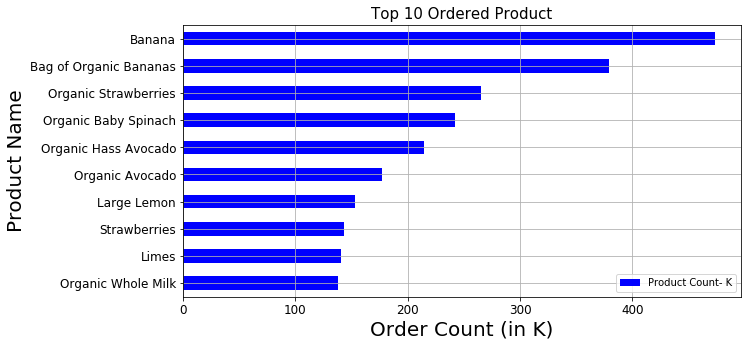

In [40]:

top10OrderedProduct.plot(x='product_name', y='Product Count- K', kind='barh', legend=False,color = 'b', fontsize=12,figsize=(10, 5),sort_columns=True);
plt.grid();
plt.xlabel('Order Count (in K)',fontsize=20) ; 
plt.ylabel('Product Name',fontsize=20)
plt.legend(loc='top right') 
plt.gca().invert_yaxis()
plt.grid('on',  axis='x' )
plt.title('Top 10 Ordered Product', fontsize=15)





In [41]:
top10OrderedProduct.set_index('product_name', inplace=True)

In [42]:
top10OrderedProduct

,Product_Count,Product Count- K
product_name,,
Banana,472565,473
Bag of Organic Bananas,379450,379
Organic Strawberries,264683,265
Organic Baby Spinach,241921,242
Organic Hass Avocado,213584,214
Organic Avocado,176815,177
Large Lemon,152657,153
Strawberries,142951,143
Limes,140627,141


In [43]:
top10OrderedProduct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Banana to Organic Whole Milk
Data columns (total 2 columns):
Product_Count       10 non-null int64
Product Count- K    10 non-null int64
dtypes: int64(2)
memory usage: 240.0+ bytes


# 1.1. Least Ordered Products that need increase in Sale

In [44]:
Least10OrderedProduct=order_product.groupby('product_name').size().sort_values(ascending=True).reset_index(name='Product_Count').head(10)
Least10OrderedProduct

,product_name,Product_Count
0,Vitamin D Gummies,1
1,Orange Recharge,1
2,"Indoor & Outdoor Allergies, Allergy & Congesti...",1
3,Homestlye Cornbread Stuffing,1
4,Lndbrg White Quinoa 16 Z,1
5,Organic Finely Shredded Sharp Cheddar Cheese,1
6,Cinnamon Rice Pudding Snacks,1
7,Blueberry Blast Fruit and Chia Seed Bar,1
8,Fig Balsamic Vinegar,1
9,11.3 Oz. Oreo Fudge Creme Double Chocolate,1


# 2. Top 10 Re-Ordered Products

In [45]:
len(order_product)

32434489

In [46]:
Top10ProductsReordered=order_product.groupby('product_name')['reordered'].agg(['sum','mean']).reset_index().sort_values(by=['sum','mean'],ascending=False).head(10)
Top10ProductsReordered['mean']=Top10ProductsReordered['mean'] * 100 
Top10ProductsReordered=Top10ProductsReordered.sort_values(by='sum',ascending=False)
Top10ProductsReordered

,product_name,sum,mean
3676,Banana,398609,84.350089
3471,Bag of Organic Bananas,315913,83.255501
31920,Organic Strawberries,205845,77.770389
28840,Organic Baby Spinach,186884,77.250011
30297,Organic Hass Avocado,170131,79.655311
28804,Organic Avocado,134044,75.810310
32478,Organic Whole Milk,114510,83.035423
22413,Large Lemon,106255,69.603752
31363,Organic Raspberries,105409,76.908877
42904,Strawberries,99802,69.815531


In [47]:
dfreorder=Top10ProductsReordered.copy()

In [48]:
dfreorder.set_index('product_name',inplace=True)


In [49]:
dfreorder.drop(['mean'],axis=1,inplace=True)


In [50]:
dfreorder

,sum
product_name,
Banana,398609
Bag of Organic Bananas,315913
Organic Strawberries,205845
Organic Baby Spinach,186884
Organic Hass Avocado,170131
Organic Avocado,134044
Organic Whole Milk,114510
Large Lemon,106255
Organic Raspberries,105409


In [51]:
dfreorder['sum in K'] = round(dfreorder['sum']/1000).apply(np.int64)

In [52]:
dfreorder.drop('sum',axis=1,inplace=True)

Text(0.5, 1.0, 'Top 10 Re-Ordered Product')

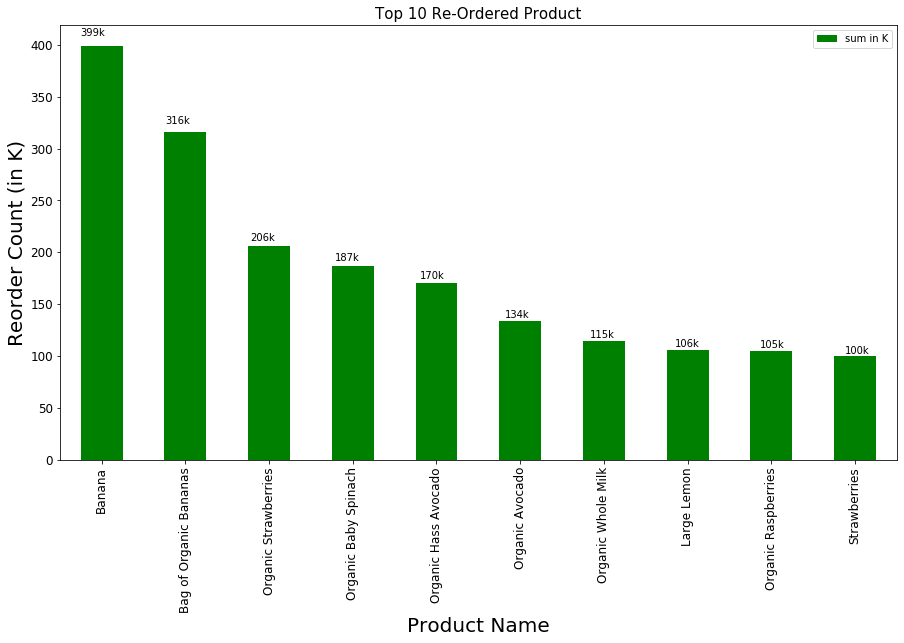

In [53]:
 
ax =dfreorder.plot(kind='bar',color = 'green', figsize=(15, 8),fontsize=12,sort_columns=True) 
for p in ax.patches:
    ax.annotate(str(format(round(p.get_height(),2),',.0f')+ 'k'), (p.get_x() * 1.015, p.get_height() * 1.025),fontsize=10,color='black')

#plt.grid('on',  axis='y' )
plt.ylabel('Reorder Count (in K)',fontsize=20) ; 
plt.xlabel('Product Name',fontsize=20)
plt.legend(loc='top right') 
#plt.grid('on',  axis='x' )
plt.title('Top 10 Re-Ordered Product', fontsize=15)



# 3 Customer Preference for Products: Organic Vs Non Organic 
# (Order & Re-Order Count)

In [54]:
order_product.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,0,196,1,0,Soda,77,7
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,2,3,7,15,196,1,1,Soda,77,7
6,2398795,1,2,3,7,15,10258,2,0,Pistachios,117,19
7,2398795,1,2,3,7,15,12427,3,1,Original Beef Jerky,23,19
8,2398795,1,2,3,7,15,13176,4,0,Bag of Organic Bananas,24,4
9,2398795,1,2,3,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19


In [55]:
# % order or organic and non organic
productDF=order_product[['order_id','reordered','product_name']].copy()


In [56]:
productDF.head(10)

,order_id,reordered,product_name
0,2539329,0,Soda
1,2539329,0,Organic Unsweetened Vanilla Almond Milk
2,2539329,0,Original Beef Jerky
3,2539329,0,Aged White Cheddar Popcorn
4,2539329,0,XL Pick-A-Size Paper Towel Rolls
5,2398795,1,Soda
6,2398795,0,Pistachios
7,2398795,1,Original Beef Jerky
8,2398795,0,Bag of Organic Bananas
9,2398795,1,Aged White Cheddar Popcorn


In [57]:
organic=productDF.loc[(productDF.product_name.str.lower().str.contains('organic')),['order_id','reordered','product_name']]


In [58]:
organic.head(10)

,order_id,reordered,product_name
1,2539329,0,Organic Unsweetened Vanilla Almond Milk
8,2398795,0,Bag of Organic Bananas
14,473747,0,Organic String Cheese
19,2254736,1,Organic String Cheese
24,431534,1,Organic String Cheese
25,431534,0,Organic Fuji Apples
28,431534,1,Bag of Organic Bananas
32,3367565,1,Organic String Cheese
36,550135,1,Organic String Cheese
41,3108588,1,Organic String Cheese


In [59]:
#Organic Vs Non Organic Order 

In [60]:
NoNOrganicProductOrder=(len(productDF)-len(organic))/len(productDF)*100
NoNOrganicProductOrder

68.39563280926055

In [61]:
organicProductOrder=len(organic)/len(productDF)*100
organicProductOrder

31.604367190739463

In [62]:
#Organic Vs Non Organic ReOrder 

In [63]:
ReOrderproductDF=productDF[productDF['reordered']==1]

In [64]:
ReOrderproductDF

,order_id,reordered,product_name
5,2398795,1,Soda
7,2398795,1,Original Beef Jerky
9,2398795,1,Aged White Cheddar Popcorn
11,473747,1,Soda
12,473747,1,Original Beef Jerky
...,...,...,...
32434478,626363,1,Fat Free Cream Cheese
32434480,2977660,1,Banana
32434481,2977660,1,Calcium Enriched 100% Lactose Free Fat Free Milk
32434482,2977660,1,Large Organic Omega3 Brown Eggs


In [65]:
ReorderorganicOrders=ReOrderproductDF.loc[(ReOrderproductDF.product_name.str.lower().str.contains('organic')),['order_id','reordered','product_name']]


In [66]:
ReorderorganicOrders.head(10)

,order_id,reordered,product_name
19,2254736,1,Organic String Cheese
24,431534,1,Organic String Cheese
28,431534,1,Bag of Organic Bananas
32,3367565,1,Organic String Cheese
36,550135,1,Organic String Cheese
41,3108588,1,Organic String Cheese
44,2295261,1,Organic Half & Half
46,2295261,1,Organic String Cheese
54,2550362,1,Organic String Cheese
75,1501582,1,Organic Avocado


In [67]:
NoNOrganicReorders=(len(ReOrderproductDF)-len(ReorderorganicOrders))/len(ReOrderproductDF)*100
NoNOrganicReorders

65.97175777150656

In [68]:
OrganicReorders=len(ReorderorganicOrders)/len(ReOrderproductDF)*100
OrganicReorders

34.02824222849344

In [69]:
df3 = pd.DataFrame({'OrderCount (%) ': [organicProductOrder,NoNOrganicProductOrder], 'ReorderCount (%) ': [OrganicReorders,NoNOrganicReorders]},index=['Organic','Non-Organic'])

In [70]:
df3


,OrderCount (%),ReorderCount (%)
Organic,31.604367,34.028242
Non-Organic,68.395633,65.971758


# -  Organic   -> Reorder Count Increases when compared to its Order Count 
# ( 31.6% increase to 34.03 %)

# - Non Oragnic ->  Reorder Count Decreases when compared to Order Count
# (68.4% reduces to 65.97%)

Text(0.5, 1.0, 'Order & Reorder Pecentage (Organic vs Non-Organic) ')

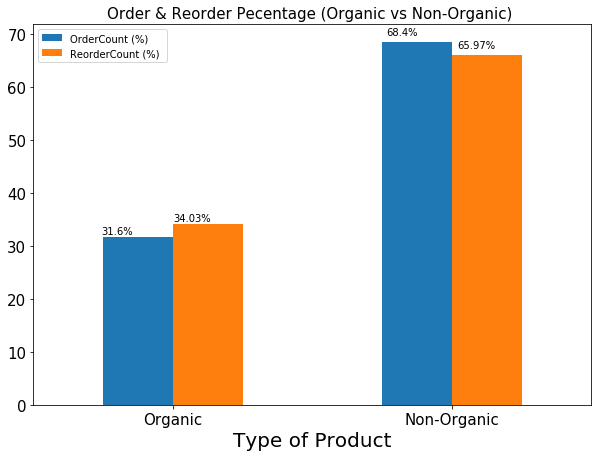

In [86]:
ax3 =df3.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7),fontsize=15)
for p in ax3.patches:
    ax3.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.020, p.get_height() * 1.020),fontsize=10,color='black')
plt.xlabel('Type of Product',fontsize=20) ; 

#plt.ylabel('Count  ',fontsize=20)   
plt.title('Order & Reorder Pecentage (Organic vs Non-Organic) ', fontsize=15)


# 4. Department that has most Product Re-Orders & Are Busy

In [71]:
TopProductsReordered=order_product.groupby('product_name')['reordered'].sum().sort_values(ascending=False).reset_index(name='ReOrderCount')

In [72]:
df1=pd.merge(TopProductsReordered,dataframeProduct,how='inner')
finaltopproductsReordered=pd.merge(df1,dataframedepartments,how='inner')[['product_name','department','ReOrderCount']]
finaltopproductsReordered
len(finaltopproductsReordered)

49677

In [73]:
finaltopproductsReordered

,product_name,department,ReOrderCount
0,Banana,produce,398609
1,Bag of Organic Bananas,produce,315913
2,Organic Strawberries,produce,205845
3,Organic Baby Spinach,produce,186884
4,Organic Hass Avocado,produce,170131
...,...,...,...
49672,Beef & Cheese Flavor In a Blanket Dog Snacks,pets,0
49673,Proactive Health Sensitive Stomach Cat Food,pets,0
49674,Chicken Crab & Herring Cat Food,pets,0
49675,Flavor Snacks,pets,0


In [74]:
ax1=finaltopproductsReordered.groupby('department')['ReOrderCount'].sum().sort_values(ascending=False).reset_index(name='Department wise Reorder Count').head(6)
ax1['Department wise Reorder Percent']=(ax1['Department wise Reorder Count']/finaltopproductsReordered['ReOrderCount'].sum()) *100
ax1

,department,Department wise Reorder Count,Department wise Reorder Percent
0,produce,6160710,32.210276
1,dairy eggs,3627221,18.964338
2,beverages,1757892,9.190854
3,snacks,1657973,8.668444
4,frozen,1211890,6.336171
5,bakery,739188,3.864725


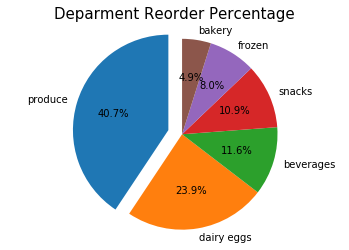

In [75]:
plt.pie(ax1['Department wise Reorder Percent'],labels=ax1['department'],shadow=False,autopct='%1.1f%%',startangle=90,explode=(0.15, 0, 0, 0, 0, 0))
plt.title('Deparment Reorder Percentage',fontsize=15)
plt.axis('equal'),
plt.show()


# 4.1 Department that has most Product Orders & are Busy

In [76]:
TopProductsOrdered=order_product.groupby('product_name').size().sort_values(ascending=False).reset_index(name='OrderCount')
x=pd.merge(TopProductsOrdered,dataframeProduct,how='inner')
finaltopproductsOrdered=pd.merge(x,dataframedepartments,how='inner')[['product_name','department','OrderCount']]
finaltopproductsOrdered


,product_name,department,OrderCount
0,Banana,produce,472565
1,Bag of Organic Bananas,produce,379450
2,Organic Strawberries,produce,264683
3,Organic Baby Spinach,produce,241921
4,Organic Hass Avocado,produce,213584
...,...,...,...
49672,Complete Health Kitten Dry Food,pets,2
49673,Original Bacon Flavor Dog Snacks,pets,2
49674,Flavor Snacks,pets,1
49675,Dynostix Rawhide Chew With Meat,pets,1


In [77]:
DepartmentWise=finaltopproductsOrdered.groupby('department')['OrderCount'].sum().sort_values(ascending=False).reset_index(name='Department wise order Count').head(6)
DepartmentWise['Department Order Percentage']=(DepartmentWise['Department wise order Count']/DepartmentWise['Department wise order Count'].sum())*100

DepartmentWise

,department,Department wise order Count,Department Order Percentage
0,produce,9479291,38.560358
1,dairy eggs,5414016,22.023419
2,snacks,2887550,11.746128
3,beverages,2690129,10.943048
4,frozen,2236432,9.097476
5,pantry,1875577,7.629571


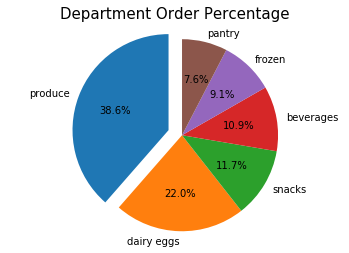

In [78]:
plt.pie(DepartmentWise['Department Order Percentage'],labels=DepartmentWise['department'],shadow=False,autopct='%1.1f%%',startangle=90,explode=(0.15, 0, 0, 0, 0, 0))
plt.title('Department Order Percentage',fontsize=15)
plt.axis('equal'),
plt.show()


# 5. Analysis for Product Count based on Day of Week

In [79]:
order_product_prior['order_dow'].unique()

array([2, 3, 4, 1, 5, 0, 6], dtype=int64)

In [80]:
DowWithMostProduct=order_product_prior.groupby(['order_dow'])['order_id'].count().sort_values(ascending=False).reset_index(name='count of products ordered')
DowWithMostProduct['percentage']=DowWithMostProduct['count of products ordered']/len(order_product_prior)*100
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 0) , 'Day Of Week'] = 'Sunday' 
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 1) , 'Day Of Week'] = 'Monday'
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 2) , 'Day Of Week'] = 'Tuesday'
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 3) , 'Day Of Week'] = 'Wednesday'
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 4) , 'Day Of Week'] = 'Thursday'
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 5) , 'Day Of Week'] = 'Friday'
DowWithMostProduct.loc[(DowWithMostProduct['order_dow'] == 6) , 'Day Of Week'] = 'Saturday'


In [81]:
DowWithMostProduct

,order_dow,count of products ordered,percentage,Day Of Week
0,0,6209666,19.145256,Sunday
1,1,5665856,17.468615,Monday
2,6,4500304,13.875058,Saturday
3,2,4217798,13.004053,Tuesday
4,5,4209533,12.978570,Friday
5,3,3844117,11.851943,Wednesday
6,4,3787215,11.676506,Thursday


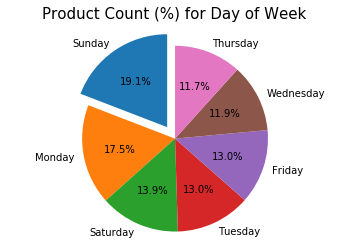

In [82]:
plt.pie(DowWithMostProduct['percentage'],labels=DowWithMostProduct['Day Of Week'],shadow=False,autopct='%1.1f%%',startangle=90,explode=(0.15, 0, 0, 0, 0, 0,0))
plt.title('Product Count (%) for Day of Week',fontsize=15)
plt.axis('equal'),
plt.show()

# Top 10 Products Ordered on Sunday i.e. Busiest Day of Week
# (as per above anaysis)

In [83]:
order_product.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,0,196,1,0,Soda,77,7
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,2,3,7,15,196,1,1,Soda,77,7
6,2398795,1,2,3,7,15,10258,2,0,Pistachios,117,19
7,2398795,1,2,3,7,15,12427,3,1,Original Beef Jerky,23,19
8,2398795,1,2,3,7,15,13176,4,0,Bag of Organic Bananas,24,4
9,2398795,1,2,3,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19


In [84]:
top10OrderedProductSunday=order_product[order_product['order_dow']==0].groupby('product_name').size().sort_values(ascending=False).reset_index(name='Product_Count').head(10)

In [85]:
top10OrderedProductSunday

,product_name,Product_Count
0,Banana,96769
1,Bag of Organic Bananas,71493
2,Organic Baby Spinach,54914
3,Organic Strawberries,53831
4,Organic Hass Avocado,43944
5,Organic Avocado,39846
6,Large Lemon,33605
7,Limes,30266
8,Strawberries,27486
9,Organic Raspberries,26378


In [86]:

top10OrderedProductSunday['Product Count- K'] = round(top10OrderedProductSunday['Product_Count']/1000).apply(np.int64)

In [87]:
top10OrderedProductSunday

,product_name,Product_Count,Product Count- K
0,Banana,96769,97
1,Bag of Organic Bananas,71493,71
2,Organic Baby Spinach,54914,55
3,Organic Strawberries,53831,54
4,Organic Hass Avocado,43944,44
5,Organic Avocado,39846,40
6,Large Lemon,33605,34
7,Limes,30266,30
8,Strawberries,27486,27
9,Organic Raspberries,26378,26


Text(0.5, 1.0, 'Top 10 Ordered Product on Busiest Day')

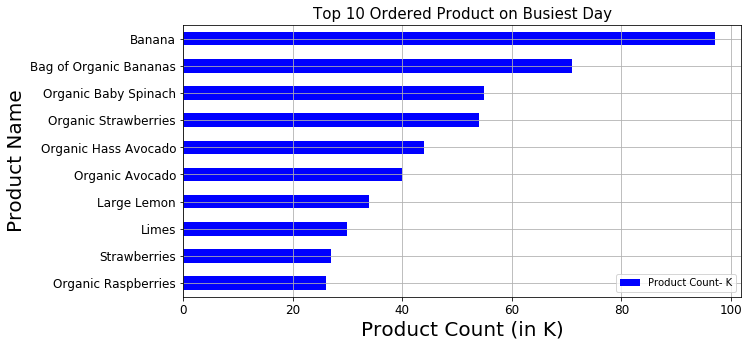

In [88]:

top10OrderedProductSunday.plot(x='product_name', y='Product Count- K', kind='barh', legend=False,color = 'b', fontsize=12,figsize=(10, 5),sort_columns=True);
plt.grid();
plt.xlabel('Product Count (in K)',fontsize=20) ; 
plt.ylabel('Product Name',fontsize=20)
plt.legend(loc='top right') 
plt.gca().invert_yaxis()
plt.grid('on',  axis='x' )
plt.title('Top 10 Ordered Product on Busiest Day', fontsize=15)





# 6. Analysis for Order  Count based on Day of Week

In [89]:
dataframeOrder.head(10)
DowWithMostOrder=dataframeOrder.groupby(['order_dow'])['order_id'].count().sort_values(ascending=False).reset_index(name='count of order')
DowWithMostOrder['percentile']=DowWithMostOrder['count of order']/len(dataframeOrder)*100
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 0) , 'Day Of Week'] = 'Sunday' 
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 1) , 'Day Of Week'] = 'Monday'
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 2) , 'Day Of Week'] = 'Tuesday'
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 3) , 'Day Of Week'] = 'Wednesday'
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 4) , 'Day Of Week'] = 'Thursday'
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 5) , 'Day Of Week'] = 'Friday'
DowWithMostOrder.loc[(DowWithMostOrder['order_dow'] == 6) , 'Day Of Week'] = 'Saturday'
DowWithMostOrder

,order_dow,count of order,percentile,Day Of Week
0,0,600905,17.564759,Sunday
1,1,587478,17.172281,Monday
2,2,467260,13.658248,Tuesday
3,5,453368,13.252178,Friday
4,6,448761,13.117513,Saturday
5,3,436972,12.772914,Wednesday
6,4,426339,12.462106,Thursday


In [90]:
DowWithMostOrder.set_index('Day Of Week', inplace=True)



In [91]:
DowWithMostOrder

,order_dow,count of order,percentile
Day Of Week,,,
Sunday,0,600905,17.564759
Monday,1,587478,17.172281
Tuesday,2,467260,13.658248
Friday,5,453368,13.252178
Saturday,6,448761,13.117513
Wednesday,3,436972,12.772914
Thursday,4,426339,12.462106


In [92]:
DowWithMostOrder.drop(['order_dow','count of order'],axis=1,inplace=True)

Text(0.5, 1.0, 'Order pecentage based on Day Of Week')

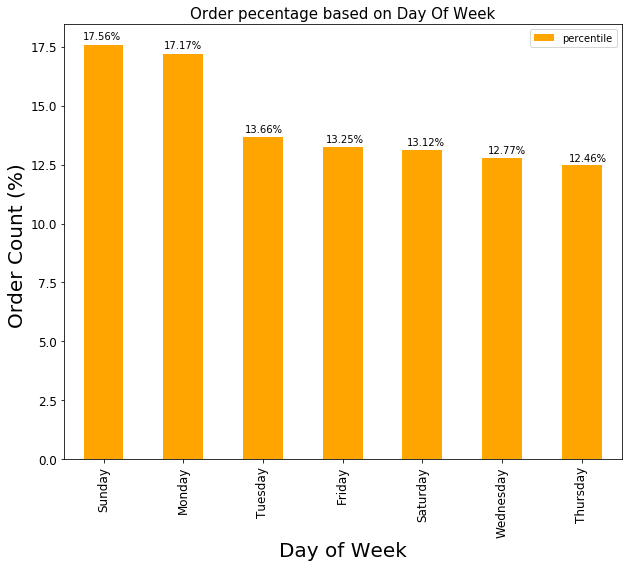

In [93]:
ax2 = DowWithMostOrder.plot(kind='bar',color = 'orange', figsize=(10, 8), fontsize=12,sort_columns=True) 
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.015, p.get_height() * 1.015),fontsize=10,color='black')
plt.xlabel('Day of Week',fontsize=20) ; 
plt.ylabel('Order Count (%) ',fontsize=20)   
plt.title('Order pecentage based on Day Of Week', fontsize=15)
#ax2.grid('on', axis='y')





# 7. Weekend vs Weekday analysis

In [94]:
bins = [0,1,6,7]
bin_labels = ['Weekend(Sun)','Weekday','Weekend(Sat)']


dataframeOrder['DOW_Group'] = pd.cut(dataframeOrder.order_dow, bins, right=False, labels = bin_labels)
dataframeOrder.loc[(dataframeOrder['DOW_Group'] == 'Weekend(Sun)') , 'Day of Week Group'] = 'Weekend' 
dataframeOrder.loc[(dataframeOrder['DOW_Group'] == 'Weekend(Sat)') , 'Day of Week Group'] = 'Weekend'
dataframeOrder.loc[(dataframeOrder['DOW_Group'] == 'Weekday') , 'Day of Week Group'] = 'Weekday'
dataframeOrder.head(10)
dataframeOrder.drop('DOW_Group',axis=1,inplace=True)
dataframeOrder

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Day of Week Group
0,2539329,1,prior,1,2,8,NaN,Weekday
1,2398795,1,prior,2,3,7,15.0,Weekday
2,473747,1,prior,3,3,12,21.0,Weekday
3,2254736,1,prior,4,4,7,29.0,Weekday
4,431534,1,prior,5,4,15,28.0,Weekday
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,Weekday
3421079,1854736,206209,prior,11,4,10,30.0,Weekday
3421080,626363,206209,prior,12,1,12,18.0,Weekday
3421081,2977660,206209,prior,13,1,12,7.0,Weekday


In [95]:
x2=dataframeOrder.groupby(['Day of Week Group']).size().sort_values(ascending=False).reset_index(name='Number of Order').head(20)

x2['percentile']=x2['Number of Order']/len(dataframeOrder)*100
x2

,Day of Week Group,Number of Order,percentile
0,Weekday,2371417,69.317728
1,Weekend,1049666,30.682272


# The weekend days (2/7) contribute to 30.7% of all the orders.

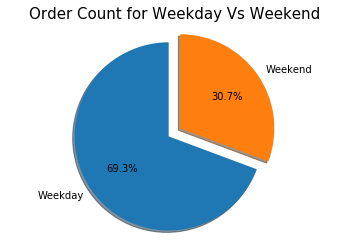

In [96]:
plt.pie(x2['percentile'],labels=x2['Day of Week Group'],shadow=True,autopct='%1.1f%%',startangle=90,explode=(0.15, 0))
plt.title('Order Count for Weekday Vs Weekend',fontsize=15)
plt.axis('equal'),
plt.show()

In [97]:
order_product_prior['order_hour_of_day'].unique()

array([ 8,  7, 12, 15,  9, 14, 16, 11, 10, 19, 18, 17, 13, 20,  0, 21, 22,
        5, 23,  4,  6,  1,  2,  3], dtype=int64)

# 8. Analysis for Weekend vs Weekday Hour of the Day that are busy 
# (for Order Count)

In [98]:
bins = [0,7,13,19,24]
bin_labels = ['Early Morning(12am - 6am)','Morning(7am - 12pm)','Afternoon(1pm - 6pm)','Evening(7pm - 11pm)']


dataframeOrder['Time_Of_Day'] = pd.cut(dataframeOrder.order_hour_of_day, bins, right=False, labels = bin_labels)
dataframeOrder

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Day of Week Group,Time_Of_Day
0,2539329,1,prior,1,2,8,NaN,Weekday,Morning(7am - 12pm)
1,2398795,1,prior,2,3,7,15.0,Weekday,Morning(7am - 12pm)
2,473747,1,prior,3,3,12,21.0,Weekday,Morning(7am - 12pm)
3,2254736,1,prior,4,4,7,29.0,Weekday,Morning(7am - 12pm)
4,431534,1,prior,5,4,15,28.0,Weekday,Afternoon(1pm - 6pm)
...,...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,Weekday,Afternoon(1pm - 6pm)
3421079,1854736,206209,prior,11,4,10,30.0,Weekday,Morning(7am - 12pm)
3421080,626363,206209,prior,12,1,12,18.0,Weekday,Morning(7am - 12pm)
3421081,2977660,206209,prior,13,1,12,7.0,Weekday,Morning(7am - 12pm)


In [99]:
timeofDayOrder=dataframeOrder.groupby(['Day of Week Group','Time_Of_Day']).size().reset_index(name='Number of Order').sort_values(by=['Day of Week Group','Number of Order'],ascending=False).head(20)
timeofDayOrder['percentage']=(timeofDayOrder['Number of Order']/len(dataframeOrder))*100
timeofDayOrder


,Day of Week Group,Time_Of_Day,Number of Order,percentage
6,Weekend,Afternoon(1pm - 6pm),485665,14.196236
5,Weekend,Morning(7am - 12pm),407157,11.901407
7,Weekend,Evening(7pm - 11pm),130345,3.810051
4,Weekend,Early Morning(12am - 6am),26499,0.774579
2,Weekday,Afternoon(1pm - 6pm),1043275,30.495460
1,Weekday,Morning(7am - 12pm),966711,28.257455
3,Weekday,Evening(7pm - 11pm),294136,8.597745
0,Weekday,Early Morning(12am - 6am),67295,1.967067


In [100]:
df2=timeofDayOrder.pivot(index='Time_Of_Day', columns='Day of Week Group', values=['percentage'])
df2

percentage           
Day of Week Group            Weekday    Weekend
Time_Of_Day                                    
Early Morning(12am - 6am)   1.967067   0.774579
Morning(7am - 12pm)        28.257455  11.901407
Afternoon(1pm - 6pm)       30.495460  14.196236
Evening(7pm - 11pm)         8.597745   3.810051

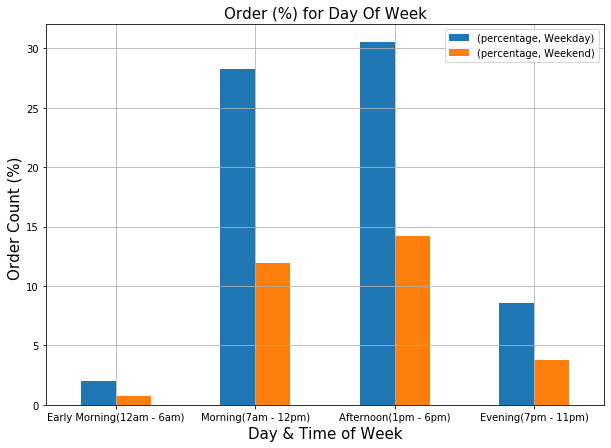

In [101]:
df2.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7),legend=False,fontsize=10);
plt.grid();
plt.xlabel('Day & Time of Week',fontsize=15) ; 
plt.ylabel('Order Count (%) ',fontsize=15)
plt.legend(loc='top right')
plt.title('Order (%) for Day Of Week', fontsize=15)
plt.grid('on',  axis='x' )




# 9. Analysis for Hour of the Day (for Order Count)

In [102]:
TimeOfDay=dataframeOrder.groupby(['Time_Of_Day',]).size().sort_values(ascending=False).reset_index(name='Number of Order').head(20)

TimeOfDay['percentile']=TimeOfDay['Number of Order']/len(dataframeOrder)*100
TimeOfDay

,Time_Of_Day,Number of Order,percentile
0,Afternoon(1pm - 6pm),1528940,44.691696
1,Morning(7am - 12pm),1373868,40.158862
2,Evening(7pm - 11pm),424481,12.407796
3,Early Morning(12am - 6am),93794,2.741646


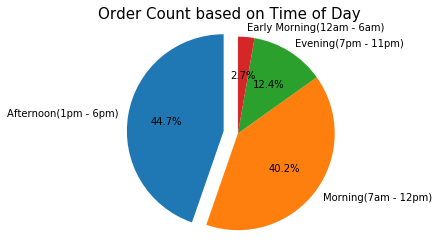

In [103]:
plt.pie(TimeOfDay['percentile'],labels=TimeOfDay['Time_Of_Day'],shadow=False,autopct='%1.1f%%',startangle=90,explode=(0.15,0,0,0))
plt.title('Order Count based on Time of Day',fontsize=15)
plt.axis('equal'),
plt.show()

# 10. On an average when does user order again?

# Answer : After 12.8 days

In [104]:
dataframeOrder_prior=dataframeOrder[dataframeOrder['eval_set']=='prior']


In [105]:
dataframeOrder_prior.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Day of Week Group,Time_Of_Day
0,2539329,1,prior,1,2,8,NaN,Weekday,Morning(7am - 12pm)
1,2398795,1,prior,2,3,7,15.0,Weekday,Morning(7am - 12pm)
2,473747,1,prior,3,3,12,21.0,Weekday,Morning(7am - 12pm)
3,2254736,1,prior,4,4,7,29.0,Weekday,Morning(7am - 12pm)
4,431534,1,prior,5,4,15,28.0,Weekday,Afternoon(1pm - 6pm)


In [106]:
dataframeOrder_prior.days_since_prior_order.fillna(0,inplace=True)
dataframeOrderprior=dataframeOrder_prior.copy()


In [107]:
dataframeOrderprior=dataframeOrderprior.groupby('user_id')['days_since_prior_order'].mean().reset_index(name='avgReorderdays')

In [108]:
dataframeOrderprior['avgReorderdays'].mean()

12.804747129477514

# 11 . What is average  user orders count

# Answer : 16.59 orders

In [109]:
dataframeOrder.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,Day of Week Group,Time_Of_Day
0,2539329,1,prior,1,2,8,NaN,Weekday,Morning(7am - 12pm)
1,2398795,1,prior,2,3,7,15.0,Weekday,Morning(7am - 12pm)
2,473747,1,prior,3,3,12,21.0,Weekday,Morning(7am - 12pm)
3,2254736,1,prior,4,4,7,29.0,Weekday,Morning(7am - 12pm)
4,431534,1,prior,5,4,15,28.0,Weekday,Afternoon(1pm - 6pm)


In [110]:
dataframeOrder_UserOrder=dataframeOrder.groupby('user_id').size().sort_values(ascending=False).reset_index(name='totaluserorder')
dataframeOrder_UserOrder

,user_id,totaluserorder
0,26086,100
1,120897,100
2,122476,100
3,31118,100
4,1868,100
...,...,...
206204,74171,4
206205,160560,4
206206,160570,4
206207,74147,4


In [111]:
dataframeOrder_UserOrder['totaluserorder'].mean()

16.590367054784224

# 12. Average no of products user buys in each order

# Answer : 10.08

In [112]:
order_product_avg=order_product_prior.groupby(['user_id','order_id']).size().reset_index(name='countofProductsPerOrder')
order_product_avg

,user_id,order_id,countofProductsPerOrder
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,2254736,5
4,1,2295261,6
...,...,...,...
3214869,206209,2307371,3
3214870,206209,2558525,3
3214871,206209,2977660,9
3214872,206209,3154581,13


In [113]:
order_product_avg['countofProductsPerOrder'].mean()

10.088883421247614

# 13. How often do people order the same products again? (re-order)

# Answer : 58.96 %

In [114]:
order_product_prior.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,0,196,1,0
1,2539329,1,1,2,8,0,14084,2,0
2,2539329,1,1,2,8,0,12427,3,0
3,2539329,1,1,2,8,0,26088,4,0
4,2539329,1,1,2,8,0,26405,5,0
5,2398795,1,2,3,7,15,196,1,1
6,2398795,1,2,3,7,15,10258,2,0
7,2398795,1,2,3,7,15,12427,3,1
8,2398795,1,2,3,7,15,13176,4,0
9,2398795,1,2,3,7,15,26088,5,1


In [115]:
total_product_count=len(order_product_prior)

In [116]:
total_reorder_productcount=len(order_product_prior[order_product_prior['reordered']==1])

In [117]:
(total_reorder_productcount/total_product_count)*100

58.969746679221615

In [118]:
x3=order_product[(order_product['product_name']=='Banana') & ((order_product['order_dow']==0) | (order_product['order_dow']==1))]
#order_product[(order_product['order_dow']==0) | (order_product['order_dow']==1)].groupby('product_name').size().sort_values(ascending=False).reset_index(name='weekendproductcount').head(20)

In [119]:
len(x3)

184556

# 14. Department & Aisle that are First to be visited when ordering

In [120]:
order_product.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,0,196,1,0,Soda,77,7
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,2,3,7,15,196,1,1,Soda,77,7
6,2398795,1,2,3,7,15,10258,2,0,Pistachios,117,19
7,2398795,1,2,3,7,15,12427,3,1,Original Beef Jerky,23,19
8,2398795,1,2,3,7,15,13176,4,0,Bag of Organic Bananas,24,4
9,2398795,1,2,3,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19


In [121]:
AddToCartOrder1=dataframeOrderProductPrior[dataframeOrderProductPrior['add_to_cart_order']==1]

In [122]:
len(order_product[order_product['add_to_cart_order']==1])

3214874

In [123]:
AddToCartOrder1.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
9,3,33754,1,1
17,4,46842,1,0
30,5,13176,1,1
56,6,40462,1,0
59,7,34050,1,0
61,8,23423,1,1
62,9,21405,1,0
77,10,24852,1,1
92,11,30162,1,1


In [124]:
AddToCartOrder1Top50=AddToCartOrder1.groupby('product_id')['add_to_cart_order'].sum().sort_values(ascending=False).reset_index(name='CountforCartOrder')

In [125]:
AddToCartOrder1Top50=pd.merge(AddToCartOrder1Top50,dataframeProduct,how='inner')


In [126]:
AddToCartOrder1Top50.head(10)

,product_id,CountforCartOrder,product_name,aisle_id,department_id
0,24852,110916,Banana,24,4
1,13176,78988,Bag of Organic Bananas,24,4
2,27845,30927,Organic Whole Milk,84,16
3,21137,27975,Organic Strawberries,24,4
4,47209,24116,Organic Hass Avocado,24,4
5,21903,23543,Organic Baby Spinach,123,4
6,47766,22398,Organic Avocado,24,4
7,19660,16822,Spring Water,115,7
8,16797,16366,Strawberries,24,4
9,27966,14393,Organic Raspberries,123,4


In [127]:
AddToCartOrder1Top50.drop(['product_id'],axis=1,inplace=True)

In [128]:
subset1=pd.merge(AddToCartOrder1Top50,dataframedepartments,how='inner')

In [129]:
subset2=pd.merge(subset1,dataframeAisle,how='inner')

In [130]:
subset2.drop(['aisle_id','department_id'],axis=1,inplace=True)

In [131]:
subset2.head(20)

,CountforCartOrder,product_name,department,aisle
0,110916,Banana,produce,fresh fruits
1,78988,Bag of Organic Bananas,produce,fresh fruits
2,27975,Organic Strawberries,produce,fresh fruits
3,24116,Organic Hass Avocado,produce,fresh fruits
4,22398,Organic Avocado,produce,fresh fruits
5,16366,Strawberries,produce,fresh fruits
6,12316,Large Lemon,produce,fresh fruits
7,9719,Limes,produce,fresh fruits
8,8762,Organic Fuji Apple,produce,fresh fruits
9,8730,Apple Honeycrisp Organic,produce,fresh fruits


In [132]:
firstdepartment=subset2.groupby(['department']).size().reset_index(name='count').sort_values(by='count',ascending=False)
firstdepartmenttop10=firstdepartment.head(10)
firstdepartmenttop10

,department,count
17,personal care,5396
20,snacks,5218
16,pantry,4332
3,beverages,3790
10,frozen,3502
7,dairy eggs,3130
11,household,2591
6,canned goods,1694
19,produce,1537
9,dry goods pasta,1529


In [133]:
FirstAisle=subset2.groupby(['aisle']).size().reset_index(name='count').sort_values(by='count',ascending=False)
FirstAisletop10=FirstAisle.head(10)
FirstAisletop10

,aisle,count
18,candy chocolate,1021
71,ice cream ice,960
133,yogurt,936
25,chips pretzels,849
130,vitamins supplements,844
93,packaged cheese,792
59,frozen meals,750
125,tea,745
42,energy granola bars,711
85,missing,706


In [134]:
FirsttoPickbyproduct=subset2.groupby(['department','aisle']).size().reset_index(name='count by product').sort_values(by=['department','count by product'],ascending=False)
FirsttoPickbyDepartment=FirsttoPickbyproduct.groupby(['department'])['count by product'].sum().reset_index(name='count by department')
FirsttoPick=pd.merge(FirsttoPickbyproduct,FirsttoPickbyDepartment,how='inner')
FirsttoPick

,department,aisle,count by product,count by department
0,snacks,candy chocolate,1021,5218
1,snacks,chips pretzels,849,5218
2,snacks,energy granola bars,711,5218
3,snacks,cookies cakes,691,5218
4,snacks,crackers,627,5218
...,...,...,...,...
129,alcohol,beers coolers,321,908
130,alcohol,red wines,194,908
131,alcohol,spirits,181,908
132,alcohol,white wines,124,908


In [135]:
FirsttoPick=FirsttoPick.groupby('department').first().sort_values(by=['count by department','count by product'],ascending=False).head(5)
FirsttoPick

,aisle,count by product,count by department
department,,,
personal care,vitamins supplements,844,5396
snacks,candy chocolate,1021,5218
pantry,spices seasonings,624,4332
beverages,tea,745,3790
frozen,ice cream ice,960,3502


In [136]:
FirsttoPick.reset_index(level=0, inplace=True)
FirsttoPick

,department,aisle,count by product,count by department
0,personal care,vitamins supplements,844,5396
1,snacks,candy chocolate,1021,5218
2,pantry,spices seasonings,624,4332
3,beverages,tea,745,3790
4,frozen,ice cream ice,960,3502


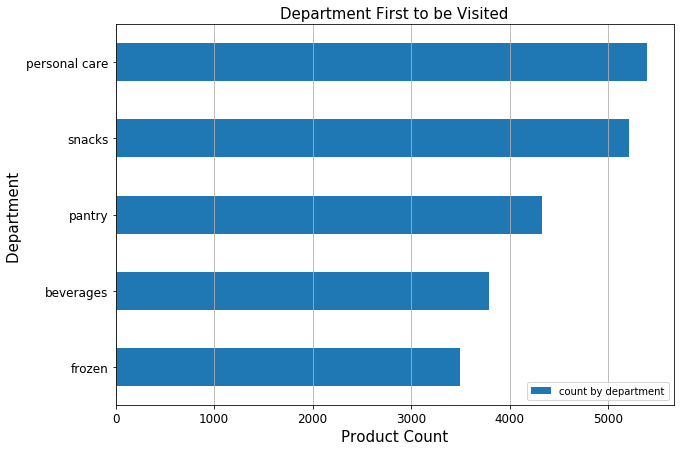

In [137]:
FirsttoPick.plot(kind='barh', x="department",y="count by department", rot = 0, figsize=(10, 7),fontsize=12);
plt.gca().invert_yaxis()
plt.xlabel('Product Count',fontsize=15) ; 
plt.ylabel('Department ',fontsize=15) ; 
plt.title('Department First to be Visited',fontsize=15)
plt.grid('on',  axis='x' )
plt.show()

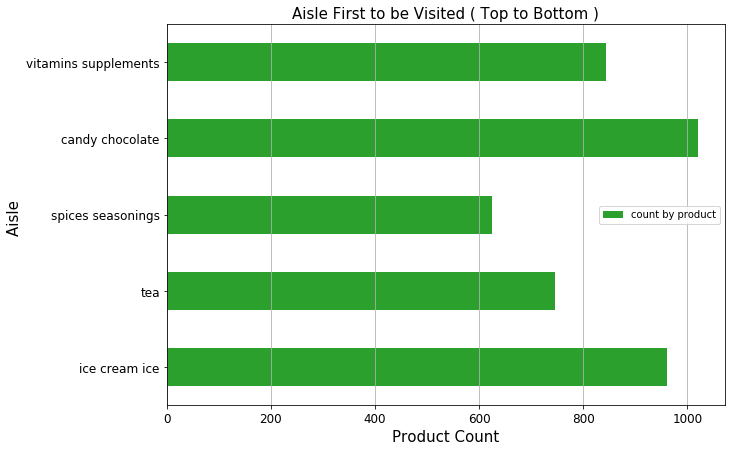

In [138]:

FirsttoPick.plot(x="aisle", y="count by product", kind="barh", color="C2",figsize=(10, 7),fontsize=12)
plt.gca().invert_yaxis()
plt.xlabel('Product Count',fontsize=15) ; 
plt.ylabel('Aisle ',fontsize=15) ;
plt.title('Aisle First to be Visited ( Top to Bottom )',fontsize=15)
plt.grid('on',  axis='x' )
plt.show()

# 15. Which products should have deals on  - weekday vs weekend

In [139]:
order_product.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,0,196,1,0,Soda,77,7
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
5,2398795,1,2,3,7,15,196,1,1,Soda,77,7
6,2398795,1,2,3,7,15,10258,2,0,Pistachios,117,19
7,2398795,1,2,3,7,15,12427,3,1,Original Beef Jerky,23,19
8,2398795,1,2,3,7,15,13176,4,0,Bag of Organic Bananas,24,4
9,2398795,1,2,3,7,15,26088,5,1,Aged White Cheddar Popcorn,23,19


In [140]:
bins = [0,1,6,7]
bin_labels = ['Weekend(Sun)','Weekday','Weekend(Sat)']


order_product['DOW_Group'] = pd.cut(order_product.order_dow, bins, right=False, labels = bin_labels)


In [141]:
weekendOrder = order_product[(order_product['order_dow']==0) | (order_product['order_dow']==6)].groupby('product_name')['order_id'].size().sort_values(ascending=False).reset_index(name='ordercount').head(50)

In [142]:
weekendOrder

,product_name,ordercount
0,Banana,160083
1,Bag of Organic Bananas,120740
2,Organic Strawberries,90554
3,Organic Baby Spinach,90038
4,Organic Hass Avocado,72457
5,Organic Avocado,64967
6,Large Lemon,56052
7,Limes,52686
8,Strawberries,46573
9,Organic Whole Milk,45657


In [143]:
weekdayOrder = order_product[~(order_product['order_dow']==0) & ~(order_product['order_dow']==6)].groupby('product_name')['order_id'].size().sort_values(ascending=False).reset_index(name='ordercount').head(50)

In [144]:
weekdayOrder

,product_name,ordercount
0,Banana,312482
1,Bag of Organic Bananas,258710
2,Organic Strawberries,174129
3,Organic Baby Spinach,151883
4,Organic Hass Avocado,141127
5,Organic Avocado,111848
6,Large Lemon,96605
7,Strawberries,96378
8,Organic Whole Milk,92248
9,Organic Raspberries,92159


In [145]:
subsetWeekdayDeals=pd.merge(weekendOrder,weekdayOrder,how='left',on='product_name')

# WeekdayDeals

In [146]:
subsetWeekdayDeals[subsetWeekdayDeals['ordercount_y'].isnull()]


WeekdayDeals=subsetWeekdayDeals[subsetWeekdayDeals['ordercount_y'].isnull()].drop(['ordercount_y'], axis=1)
#WeekdayDeals=WeekdayDeals.drop(['ordercount_y'], axis=1)
WeekdayDeals

,product_name,ordercount_x
40,Red Peppers,21393
41,Green Bell Pepper,21327
42,Boneless Skinless Chicken Breasts,20744
45,Organic Peeled Whole Baby Carrots,20206
46,Red Vine Tomato,20141


In [147]:
subsetweekendDeals=pd.merge(weekendOrder,weekdayOrder,how='right',on='product_name')
subsetweekendDeals

,product_name,ordercount_x,ordercount_y
0,Banana,160083.0,312482
1,Bag of Organic Bananas,120740.0,258710
2,Organic Strawberries,90554.0,174129
3,Organic Baby Spinach,90038.0,151883
4,Organic Hass Avocado,72457.0,141127
5,Organic Avocado,64967.0,111848
6,Large Lemon,56052.0,96605
7,Limes,52686.0,87941
8,Strawberries,46573.0,96378
9,Organic Whole Milk,45657.0,92248


# WeekendDeals

In [148]:
subsetweekendDeals[subsetweekendDeals['ordercount_x'].isnull()]
WeekendDeals=subsetweekendDeals[subsetweekendDeals['ordercount_x'].isnull()].drop(['ordercount_x'], axis=1)
#WeekendDeals=WeekendDeals.drop(['ordercount_x'], axis=1)
WeekendDeals

,product_name,ordercount_y
45,Raspberries,39795
46,Organic Granny Smith Apple,39712
47,Spring Water,38911
48,Organic Unsweetened Almond Milk,38773
49,Blueberries,37607


In [149]:
# Correlation :

# There doesnt seem to be very less correlation between Reordered Yes/No with Hour_of_Day or Day_of_Week or day_since_prior_order. 


In [150]:
order_product_prior.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
order_id,1.000000,-0.000482,-0.000543,0.001205,0.000652,0.000656,-0.000082,-0.000320,-0.000253
user_id,-0.000482,1.000000,-0.000768,-0.001630,-0.000415,0.000448,0.000080,0.000729,-0.000862
order_number,-0.000543,-0.000768,1.000000,0.015209,-0.040049,-0.257864,-0.001925,-0.004228,0.306840
order_dow,0.001205,-0.001630,0.015209,1.000000,0.012176,-0.026520,-0.002350,-0.009071,-0.006949
order_hour_of_day,0.000652,-0.000415,-0.040049,0.012176,1.000000,-0.000195,0.000942,-0.014805,-0.023300
days_since_prior_order,0.000656,0.000448,-0.257864,-0.026520,-0.000195,1.000000,0.000563,0.050260,-0.024465
product_id,-0.000082,0.000080,-0.001925,-0.002350,0.000942,0.000563,1.000000,0.005529,0.003718
add_to_cart_order,-0.000320,0.000729,-0.004228,-0.009071,-0.014805,0.050260,0.005529,1.000000,-0.133024
reordered,-0.000253,-0.000862,0.306840,-0.006949,-0.023300,-0.024465,0.003718,-0.133024,1.000000
